# This is to convert from nmea to Plane Rectangular. Coordinate System by GSI(Geospatial Information Authority of Japan) HP.

# 緯度経度(nmea)から平面直角座標へ国土地理院のHPで変換したい場合

https://vldb.gsi.go.jp/sokuchi/surveycalc/surveycalc/bl2xyf.html

when calculate again,

if you want

%reset

In [67]:
#if you want
#check current directory
%pwd

'C:\\Users\\survey\\Dropbox\\My PC (SURVEY-C20)\\Documents\\GitHub\\GNSS'

'C:\\Users\\survey\\Dropbox\\My PC (SURVEY-C20)\\Documents\\GitHub\\GNSS'

In [68]:
#define working directroy
# %cd C:\\Users\\survey\\Desktop\\nmea20210705
%cd C:\Users\survey\Dropbox\My PC (SURVEY-C20)\Documents\GitHub\GNSS

C:\Users\survey\Dropbox\My PC (SURVEY-C20)\Documents\GitHub\GNSS
C:\Users\survey\Dropbox\My PC (SURVEY-C20)\Documents\GitHub\GNSS


In [69]:
#check files
%ls

 ドライブ C のボリューム ラベルがありません。
 ボリューム シリアル番号は 3C86-6F6B です

 C:\Users\survey\Dropbox\My PC (SURVEY-C20)\Documents\GitHub\GNSS のディレクトリ

2021/08/04  10:16    <DIR>          .
2021/07/09  19:44    <DIR>          ..
2021/07/10  15:42               214 .gitignore
2021/08/04  10:32    <DIR>          .idea
2021/06/29  17:26            11,672 bl2xy.in
2021/06/29  17:35            27,627 bl2xy.out
2021/07/10  18:16            31,846 con.csv
2021/07/10  18:22            31,846 concon.csv
2021/07/10  19:23            49,660 concon.xlsx
2021/07/31  21:25            35,393 coordinate_transformation.ipynb
2021/07/30  10:43    <DIR>          data
2021/07/10  15:42             1,523 GG1.csv
2021/07/10  15:42             1,357 GG2.csv
2021/07/11  11:02            39,737 gnss_concate.ipynb
2021/07/30  13:53            55,990 gnss_concate_vertical.ipynb
2021/07/30  14:56            67,257 gnss_concate_vertical_simple.ipynb
2021/07/30  10:59            11,228 gnss_extract.ipynb
2021/07/12  19:10            21,

In [70]:
import pandas as pd
import numpy as np
import csv
import math
import matplotlib.pyplot as plt

# 1. まずは，入力ファイルを設定します.

In [71]:
# inp_file="2021-07-05_10.nmea"
inp_file="C:\\Users\survey\Desktop\\nmea20210705\\2021-07-05_09+10_GNRMC.csv"
# inp_file="2021070509_XY.csv"
# # inp_file="VRS直_2021-07-05-12-48-07.rtk"
# inp_file="VRS直_2021-06-27-11-45-43.rtk"

# base_nameを取得しておきます．
# 出力ファイル名を自動で作成するため

# if you want to define output filename automatically

type(inp_file)
base_name=inp_file.split('.',1)[0]
base_name
## inp_file="VRS直_2021-07-05-12-48-07_get.rtk"

In [72]:
%pwd

'C:\\Users\\survey\\Dropbox\\My PC (SURVEY-C20)\\Documents\\GitHub\\GNSS'

'C:\\Users\\survey\\Dropbox\\My PC (SURVEY-C20)\\Documents\\GitHub\\GNSS'

# make output filename from input file automatically

# out_file="2021-07-05_10_GNRMC_out_test.csv"
# out_file="VRS直_2021-07-05-12-48-07_get.rtk"
# out_file=base_name+"_get.rtk"
out_file=base_name+"_GSI.in"
out_file
# out_file="VRS直_2021-07-05-12-48-07_get.rtk"

# This is important
## nmeaはUTF-8
## Trimble製GNSSの観測結果はshift_jisなはず

In [73]:
enc_sty="UTF-8"

# enc_sty="shift_jis"

In [74]:
# with open("2021-07-05_10.nmea", "r", encoding="UTF-8", errors="", newline="" ) as f:
# with open(inp_file, "r", encoding="UTF-8", errors="", newline="" ) as f:
with open(inp_file, "r", encoding=enc_sty, errors="", newline="" ) as f:
    lst = csv.reader(f, delimiter=",")
    df = pd.DataFrame(lst).rename(columns={0:'ID',1:'time',2:'de',3:'lat',5:'lon',7:'knot',9:'date',12:'mode'})
    # df = pd.DataFrame(lst)

get_id='GNRMC'

In [75]:
df_gnrmc=df.query('ID in ["$GNRMC"]')
# df_gnrmc['lat']=df_gnrmc['lat'].astype(float)

In [76]:
df_gnrmc.dtypes

ID      object
time    object
de      object
lat     object
4       object
lon     object
6       object
knot    object
8       object
date    object
10      object
11      object
mode    object
13      object
14      object
15      object
16      object
17      object
18      object
19      object
20      object
21      object
22      object
23      object
24      object
25      object
26      object
27      object
28      object
29      object
30      object
31      object
32      object
33      object
34      object
35      object
36      object
37      object
38      object
39      object
40      object
41      object
42      object
43      object
44      object
45      object
46      object
47      object
48      object
49      object
dtype: object

ID      object
time    object
de      object
lat     object
4       object
lon     object
6       object
knot    object
8       object
date    object
10      object
11      object
mode    object
13      object
14      object
15      object
16      object
17      object
18      object
19      object
20      object
21      object
22      object
23      object
24      object
25      object
26      object
27      object
28      object
29      object
30      object
31      object
32      object
33      object
34      object
35      object
36      object
37      object
38      object
39      object
40      object
41      object
42      object
43      object
44      object
45      object
46      object
47      object
48      object
49      object
dtype: object

In [77]:
#中身の確認
df_gnrmc

,ID,time,de,lat,4,lon,6,knot,8,date,...,40,41,42,43,44,45,46,47,48,49
0,$GNRMC,000145.00,V,,,,,,,050721,...,,,,,,,,,,
1,$GNRMC,000145.12,V,,,,,,,050721,...,,,,,,,,,,
2,$GNRMC,000145.25,V,,,,,,,050721,...,,,,,,,,,,
3,$GNRMC,000145.37,V,,,,,,,050721,...,,,,,,,,,,
4,$GNRMC,000145.50,V,,,,,,,050721,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,010834.38,A,3511.0129030,N,13707.1113436,E,0.015,,050721,...,,,,,,,,,,
30715,$GNRMC,010834.50,A,3511.0129025,N,13707.1113439,E,0.024,,050721,...,,,,,,,,,,
30716,$GNRMC,010834.63,A,3511.0129041,N,13707.1113448,E,0.015,,050721,...,,,,,,,,,,
30717,$GNRMC,010834.75,A,3511.0129040,N,13707.1113448,E,0.025,,050721,...,,,,,,,,,,


,ID,time,de,lat,4,lon,6,knot,8,date,...,40,41,42,43,44,45,46,47,48,49
0,$GNRMC,000145.00,V,,,,,,,050721,...,,,,,,,,,,
1,$GNRMC,000145.12,V,,,,,,,050721,...,,,,,,,,,,
2,$GNRMC,000145.25,V,,,,,,,050721,...,,,,,,,,,,
3,$GNRMC,000145.37,V,,,,,,,050721,...,,,,,,,,,,
4,$GNRMC,000145.50,V,,,,,,,050721,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,010834.38,A,3511.0129030,N,13707.1113436,E,0.015,,050721,...,,,,,,,,,,
30715,$GNRMC,010834.50,A,3511.0129025,N,13707.1113439,E,0.024,,050721,...,,,,,,,,,,
30716,$GNRMC,010834.63,A,3511.0129041,N,13707.1113448,E,0.015,,050721,...,,,,,,,,,,
30717,$GNRMC,010834.75,A,3511.0129040,N,13707.1113448,E,0.025,,050721,...,,,,,,,,,,


## 桁落ちが発生するので，ここで桁の設定（多め）をしておきましょう

In [78]:
pd.options.display.float_format = '{:.7f}'.format

# データに空白あり！これはやっかい（データ型の変換ができなかったり）なので，NaN(Not a Number)で埋めときましょう

In [79]:
# df_gnrmc['lat'] == ''] = None
# 空欄にnp.nanを入れる

df_gnrmc=df_gnrmc.replace('', np.nan)

In [80]:
df_gnrmc

,ID,time,de,lat,4,lon,6,knot,8,date,...,40,41,42,43,44,45,46,47,48,49
0,$GNRMC,000145.00,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GNRMC,000145.12,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNRMC,000145.25,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,000145.37,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,000145.50,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,010834.38,A,3511.0129030,N,13707.1113436,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30715,$GNRMC,010834.50,A,3511.0129025,N,13707.1113439,E,0.024,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30716,$GNRMC,010834.63,A,3511.0129041,N,13707.1113448,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30717,$GNRMC,010834.75,A,3511.0129040,N,13707.1113448,E,0.025,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ID,time,de,lat,4,lon,6,knot,8,date,...,40,41,42,43,44,45,46,47,48,49
0,$GNRMC,000145.00,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GNRMC,000145.12,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNRMC,000145.25,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,000145.37,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,000145.50,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,010834.38,A,3511.0129030,N,13707.1113436,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30715,$GNRMC,010834.50,A,3511.0129025,N,13707.1113439,E,0.024,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30716,$GNRMC,010834.63,A,3511.0129041,N,13707.1113448,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30717,$GNRMC,010834.75,A,3511.0129040,N,13707.1113448,E,0.025,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df_gnrmc.dtypes

ID       object
time     object
de       object
lat      object
4        object
lon      object
6        object
knot     object
8        object
date     object
10      float64
11      float64
mode     object
13       object
14      float64
15      float64
16      float64
17      float64
18      float64
19      float64
20      float64
21      float64
22      float64
23      float64
24      float64
25      float64
26      float64
27      float64
28      float64
29      float64
30      float64
31      float64
32      float64
33      float64
34      float64
35      float64
36      float64
37      float64
38      float64
39      float64
40      float64
41      float64
42      float64
43      float64
44      float64
45      float64
46      float64
47      float64
48      float64
49      float64
dtype: object

ID       object
time     object
de       object
lat      object
4        object
lon      object
6        object
knot     object
8        object
date     object
10      float64
11      float64
mode     object
13       object
14      float64
15      float64
16      float64
17      float64
18      float64
19      float64
20      float64
21      float64
22      float64
23      float64
24      float64
25      float64
26      float64
27      float64
28      float64
29      float64
30      float64
31      float64
32      float64
33      float64
34      float64
35      float64
36      float64
37      float64
38      float64
39      float64
40      float64
41      float64
42      float64
43      float64
44      float64
45      float64
46      float64
47      float64
48      float64
49      float64
dtype: object

In [82]:
df_gnrmc['time']=df_gnrmc['time'].astype(float)

In [83]:
df_gnrmc

,ID,time,de,lat,4,lon,6,knot,8,date,...,40,41,42,43,44,45,46,47,48,49
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ID,time,de,lat,4,lon,6,knot,8,date,...,40,41,42,43,44,45,46,47,48,49
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


df_gnrmc['lat']=df_gnrmc['lat'].astype(float)

df_gnrmc['lon']=df_gnrmc['lon'].astype(float)

In [84]:
df_gnrmc

,ID,time,de,lat,4,lon,6,knot,8,date,...,40,41,42,43,44,45,46,47,48,49
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ID,time,de,lat,4,lon,6,knot,8,date,...,40,41,42,43,44,45,46,47,48,49
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df_gnrmc.dtypes

ID       object
time    float64
de       object
lat      object
4        object
lon      object
6        object
knot     object
8        object
date     object
10      float64
11      float64
mode     object
13       object
14      float64
15      float64
16      float64
17      float64
18      float64
19      float64
20      float64
21      float64
22      float64
23      float64
24      float64
25      float64
26      float64
27      float64
28      float64
29      float64
30      float64
31      float64
32      float64
33      float64
34      float64
35      float64
36      float64
37      float64
38      float64
39      float64
40      float64
41      float64
42      float64
43      float64
44      float64
45      float64
46      float64
47      float64
48      float64
49      float64
dtype: object

ID       object
time    float64
de       object
lat      object
4        object
lon      object
6        object
knot     object
8        object
date     object
10      float64
11      float64
mode     object
13       object
14      float64
15      float64
16      float64
17      float64
18      float64
19      float64
20      float64
21      float64
22      float64
23      float64
24      float64
25      float64
26      float64
27      float64
28      float64
29      float64
30      float64
31      float64
32      float64
33      float64
34      float64
35      float64
36      float64
37      float64
38      float64
39      float64
40      float64
41      float64
42      float64
43      float64
44      float64
45      float64
46      float64
47      float64
48      float64
49      float64
dtype: object

df_gnrmc['lat']=df_gnrmc['lat']-10

In [86]:
df_gnrmc

,ID,time,de,lat,4,lon,6,knot,8,date,...,40,41,42,43,44,45,46,47,48,49
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ID,time,de,lat,4,lon,6,knot,8,date,...,40,41,42,43,44,45,46,47,48,49
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


df_gnrmc['lat'] = pd.to_numeric(df_gnrmc['lat'], errors='coerce', downcast='float')
# df_gnrmc['lat']=df_gnrmc['lat'].astype(float)

df_gnrmc['lat'] = pd.to_numeric(df_gnrmc['lat'], errors='coerce', downcast='float')

In [87]:
df_gnrmc.dtypes

ID       object
time    float64
de       object
lat      object
4        object
lon      object
6        object
knot     object
8        object
date     object
10      float64
11      float64
mode     object
13       object
14      float64
15      float64
16      float64
17      float64
18      float64
19      float64
20      float64
21      float64
22      float64
23      float64
24      float64
25      float64
26      float64
27      float64
28      float64
29      float64
30      float64
31      float64
32      float64
33      float64
34      float64
35      float64
36      float64
37      float64
38      float64
39      float64
40      float64
41      float64
42      float64
43      float64
44      float64
45      float64
46      float64
47      float64
48      float64
49      float64
dtype: object

ID       object
time    float64
de       object
lat      object
4        object
lon      object
6        object
knot     object
8        object
date     object
10      float64
11      float64
mode     object
13       object
14      float64
15      float64
16      float64
17      float64
18      float64
19      float64
20      float64
21      float64
22      float64
23      float64
24      float64
25      float64
26      float64
27      float64
28      float64
29      float64
30      float64
31      float64
32      float64
33      float64
34      float64
35      float64
36      float64
37      float64
38      float64
39      float64
40      float64
41      float64
42      float64
43      float64
44      float64
45      float64
46      float64
47      float64
48      float64
49      float64
dtype: object

In [88]:
df_gnrmc_ll=df_gnrmc.filter(items=['lat','lon'])

In [89]:
df_gnrmc_ll

,lat,lon
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
30714,3511.0129030,13707.1113436
30715,3511.0129025,13707.1113439
30716,3511.0129041,13707.1113448
30717,3511.0129040,13707.1113448


,lat,lon
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
30714,3511.0129030,13707.1113436
30715,3511.0129025,13707.1113439
30716,3511.0129041,13707.1113448
30717,3511.0129040,13707.1113448


In [90]:
df_gnrmc_ll.dtypes

lat    object
lon    object
dtype: object

lat    object
lon    object
dtype: object

#これではまだpandasのデータフレーム
df_gnrmc_ll_f=df_gnrmc_ll.astype(float)

df_gnrmc_ll_f

type(df_gnrmc_ll_f)

## ↑ここまではPANDA

In [91]:
df_gnrmc_ll['lat']=df_gnrmc_ll['lat'].astype(float)
df_gnrmc_ll['lon']=df_gnrmc_ll['lon'].astype(float)
# df_gnrmc_ll['lon']=pd.to_numeric(df_gnrmc_ll['lon'])

In [92]:
df_gnrmc_ll.dtypes

lat    float64
lon    float64
dtype: object

lat    float64
lon    float64
dtype: object

df

df_gnrmc_ll = df_gnrmc_ll.reset_index(drop=True)
df_gnrmc_ll

In [93]:
type(df_gnrmc_ll)

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

## ここで  numpy化する.to_numpyで
## ↑はまだpanda

# numpy化は必要か？<-必要！

In [94]:
# numpy化
df_gnrmc_ll_np=df_gnrmc_ll.to_numpy()

In [95]:
df_gnrmc_ll_np

array([[          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       ...,
       [ 3511.0129041, 13707.1113448],
       [ 3511.012904 , 13707.1113448],
       [ 3511.0129026, 13707.1113445]])

array([[          nan,           nan],
       [          nan,           nan],
       [          nan,           nan],
       ...,
       [ 3511.0129041, 13707.1113448],
       [ 3511.012904 , 13707.1113448],
       [ 3511.0129026, 13707.1113445]])

In [96]:
type(df_gnrmc_ll_np)

numpy.ndarray

numpy.ndarray

In [97]:
df_gnrmc_ll_np.dtype

dtype('float64')

dtype('float64')

In [98]:
print(df_gnrmc_ll_np[:,0])

[         nan          nan          nan ... 3511.0129041 3511.012904
 3511.0129026]
[         nan          nan          nan ... 3511.0129041 3511.012904
 3511.0129026]


In [99]:
a=divmod(df_gnrmc_ll_np[:,0],100)
b=divmod(df_gnrmc_ll_np[:,1],100)
# # a=np.divmod(df_gnrmc_ll_np[:,0],100)
# a=divmod(df_gnrmc[:,:],100)

<ipython-input-33-fbc2b0bd8929>:1: RuntimeWarning: invalid value encountered in divmod
  a=divmod(df_gnrmc_ll_np[:,0],100)
<ipython-input-33-fbc2b0bd8929>:2: RuntimeWarning: invalid value encountered in divmod
  b=divmod(df_gnrmc_ll_np[:,1],100)
<ipython-input-99-fbc2b0bd8929>:1: RuntimeWarning: invalid value encountered in divmod
  a=divmod(df_gnrmc_ll_np[:,0],100)
<ipython-input-99-fbc2b0bd8929>:2: RuntimeWarning: invalid value encountered in divmod
  b=divmod(df_gnrmc_ll_np[:,1],100)


In [100]:
a[0]

array([nan, nan, nan, ..., 35., 35., 35.])

array([nan, nan, nan, ..., 35., 35., 35.])

In [101]:
a[1]

array([       nan,        nan,        nan, ..., 11.0129041, 11.012904 ,
       11.0129026])

array([       nan,        nan,        nan, ..., 11.0129041, 11.012904 ,
       11.0129026])

In [102]:
b[0]

array([ nan,  nan,  nan, ..., 137., 137., 137.])

array([ nan,  nan,  nan, ..., 137., 137., 137.])

In [103]:
b[1]

array([      nan,       nan,       nan, ..., 7.1113448, 7.1113448,
       7.1113445])

array([      nan,       nan,       nan, ..., 7.1113448, 7.1113448,
       7.1113445])

In [104]:
df_gnrmc_ll_np_lat=a[0]+a[1]/60
print(df_gnrmc_ll_np_lat)

[        nan         nan         nan ... 35.1835484  35.1835484
 35.18354838]
[        nan         nan         nan ... 35.1835484  35.1835484
 35.18354838]


In [105]:
df_gnrmc_ll_np_lon=b[0]+b[1]/60
print(df_gnrmc_ll_np_lon)

[         nan          nan          nan ... 137.11852241 137.11852241
 137.11852241]
[         nan          nan          nan ... 137.11852241 137.11852241
 137.11852241]


type(df_gnrmc_ll_np_wa)

# 度分秒を小数表示する
def decimal(deg,mint,sec):
    deg_int=deg
    mint=mint+sec/60
    deg_dec=mint/60

    deg_all=deg_int+deg_dec
    return deg_all

x=decimal(137,10,0)
print(x)


下の関数，show_angle(deg)は，下記を参照しました．@sw1227さんありがとうございます．

https://qiita.com/sw1227/items/e7a590994ad7dcd0e8ab
https://nbviewer.jupyter.org/github/nabewari/PRCS2WGS/blob/master/coordinate_transformation.ipynb

def show_angle(deg):
    """ 小数点の角度[deg]を度,分,秒で表記 """
    d = int(np.floor(deg))
    m = int(np.floor((deg%1) * 60))
    s = ( ((deg%1)*60) % 1 ) * 60
    return """ {0}°{1:02d}'{2}" """.format(d, m, s) # 分は10の位を0埋めする

df_gnrmc_ll_np_wa.shape

for i in range(0,df_gnrmc_ll_np_wa.shape[0]):
    print(df_gnrmc_ll_np_wa[i,0])

for i in range(0,df_gnrmc_ll_np_wa.shape[0]):
    print(df_gnrmc_ll_np_wa[i,1])

for i, item in np.ndenumerate(df_gnrmc_ll_np_wa[:,0]):
    # for i, item in np.ndenumerate(df_gnrmc_ll_np_wa[:,0]):
    print(i,item)
    # print(i)

for i, item in np.ndenumerate(df_gnrmc_ll_np_wa[:,0]):
    # print(i,item)
    j=item
    if(math.isnan(item)==True):
        print('num')
    else:
        print(show_angle(item))
    # show_angle(j)

# 下の関数，
# calc_xy
# は，下記を参照しました．@sw1227さんありがとうございます．

https://qiita.com/sw1227/items/e7a590994ad7dcd0e8ab
https://nbviewer.jupyter.org/github/nabewari/PRCS2WGS/blob/master/coordinate_transformation.ipynb

## 3. 実装（緯度経度 -> 平面直角座標の関数）
### 3.1. 緯度経度 -> 平面直角座標の関数

In [106]:
def calc_xy(phi_deg, lambda_deg, phi0_deg, lambda0_deg):
    """ 緯度経度を平面直角座標に変換する
    - input:
        (phi_deg, lambda_deg): 変換したい緯度・経度[度]（分・秒でなく小数であることに注意）
        (phi0_deg, lambda0_deg): 平面直角座標系原点の緯度・経度[度]（分・秒でなく小数であることに注意） 	7系　北緯=36度0分0秒 東経=137度10分0秒
    - output:
        x: 変換後の平面直角座標[m]
        y: 変換後の平面直角座標[m]
    """
    # 緯度経度・平面直角座標系原点をラジアンに直す
    phi_rad = np.deg2rad(phi_deg)
    lambda_rad = np.deg2rad(lambda_deg)
    phi0_rad = np.deg2rad(phi0_deg)
    lambda0_rad = np.deg2rad(lambda0_deg)

    # 補助関数
    def A_array(n):
        A0 = 1 + (n**2)/4. + (n**4)/64.
        A1 = -     (3./2)*( n - (n**3)/8. - (n**5)/64. )
        A2 =     (15./16)*( n**2 - (n**4)/4. )
        A3 = -   (35./48)*( n**3 - (5./16)*(n**5) )
        A4 =   (315./512)*( n**4 )
        A5 = -(693./1280)*( n**5 )
        return np.array([A0, A1, A2, A3, A4, A5])

    def alpha_array(n):
        a0 = np.nan # dummy
        a1 = (1./2)*n - (2./3)*(n**2) + (5./16)*(n**3) + (41./180)*(n**4) - (127./288)*(n**5)
        a2 = (13./48)*(n**2) - (3./5)*(n**3) + (557./1440)*(n**4) + (281./630)*(n**5)
        a3 = (61./240)*(n**3) - (103./140)*(n**4) + (15061./26880)*(n**5)
        a4 = (49561./161280)*(n**4) - (179./168)*(n**5)
        a5 = (34729./80640)*(n**5)
        return np.array([a0, a1, a2, a3, a4, a5])

    # 定数 (a, F: 世界測地系-測地基準系1980（GRS80）楕円体)
    m0 = 0.9999
    a = 6378137.
    F = 298.257222101

    # (1) n, A_i, alpha_iの計算
    n = 1. / (2*F - 1)
    A_array = A_array(n)
    alpha_array = alpha_array(n)

    # (2), S, Aの計算
    A_ = ( (m0*a)/(1.+n) )*A_array[0] # [m]
    S_ = ( (m0*a)/(1.+n) )*( A_array[0]*phi0_rad + np.dot(A_array[1:], np.sin(2*phi0_rad*np.arange(1,6))) ) # [m]

    # (3) lambda_c, lambda_sの計算
    lambda_c = np.cos(lambda_rad - lambda0_rad)
    lambda_s = np.sin(lambda_rad - lambda0_rad)

    # (4) t, t_の計算
    t = np.sinh( np.arctanh(np.sin(phi_rad)) - ((2*np.sqrt(n)) / (1+n))*np.arctanh(((2*np.sqrt(n)) / (1+n)) * np.sin(phi_rad)) )
    t_ = np.sqrt(1 + t*t)

    # (5) xi', eta'の計算
    xi2  = np.arctan(t / lambda_c) # [rad]
    eta2 = np.arctanh(lambda_s / t_)

    # (6) x, yの計算
    x = A_ * (xi2 + np.sum(np.multiply(alpha_array[1:],
                                       np.multiply(np.sin(2*xi2*np.arange(1,6)),
                                                   np.cosh(2*eta2*np.arange(1,6)))))) - S_ # [m]
    y = A_ * (eta2 + np.sum(np.multiply(alpha_array[1:],
                                        np.multiply(np.cos(2*xi2*np.arange(1,6)),
                                                    np.sinh(2*eta2*np.arange(1,6)))))) # [m]
    # return
    return x, y # [m]

In [107]:
latlon=np.stack([df_gnrmc_ll_np_lat,df_gnrmc_ll_np_lon],1)
print(latlon)

[[         nan          nan]
 [         nan          nan]
 [         nan          nan]
 ...
 [ 35.1835484  137.11852241]
 [ 35.1835484  137.11852241]
 [ 35.18354838 137.11852241]]
[[         nan          nan]
 [         nan          nan]
 [         nan          nan]
 ...
 [ 35.1835484  137.11852241]
 [ 35.1835484  137.11852241]
 [ 35.18354838 137.11852241]]


In [108]:
latlon

array([[         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       ...,
       [ 35.1835484 , 137.11852241],
       [ 35.1835484 , 137.11852241],
       [ 35.18354838, 137.11852241]])

array([[         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       ...,
       [ 35.1835484 , 137.11852241],
       [ 35.1835484 , 137.11852241],
       [ 35.18354838, 137.11852241]])

# x, y = calc_xy(df_gnrmc_ll_np_wa[:,0], df_gnrmc_ll_np_wa[:,1], 36., 137+10./60)
x, y = calc_xy(latlon[:,0], latlon[:,1], 36., 137+10./60)

In [109]:
for i in range(0,latlon.shape[0]):
# for i in range(0,df_gnrmc_ll_np_wa.shape[0]):
#     print(df_gnrmc_ll_np_wa[i,1])
# for i, item in np.ndenumerate(df_gnrmc_ll_np_wa[:,0]):
    # print(i,item)
    # j=item
    if(math.isnan(latlon[i,0],)==True):
        print('nan')
    else:
        # print(show_angle(item))
        x, y = calc_xy(latlon[i,0], latlon[i,1], 36., 137+10./60)
        # x, y = calc_xy(df_gnrmc_ll_np_wa[i,0], df_gnrmc_ll_np_wa[i,1], 36., 137+10./60)
        latlon[i,0]=x
        latlon[i,1]=y
        print("x, y = ({0}, {1})".format(x, y))
    # show_angle(j)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
x, y = (-90577.70825839229, -4386.47706529542)
x, y = (-90577.65629469138, -4386.497987325738)
x, y = (-90577.64132088749, -4386.4935781245795)
x, y = (-90577.63614799129, -4386.4853788901755)
x, y = (-90577.63374429662, -4386.485681307617)
x, y = (-90577.62468250142, -4386.490382448578)
x, y = (-90577.61636231653, -4386.4908337888355)
x, y = (-90577.6093339962, -4386.496143085049)
x, y = (-90577.60230589611, -4386.500996999558)
x, y = (-90577.59287608834, -4386.502054970363)
x, y = (-90577.58862344176, -4386.5025082854)
x, y = (-

In [110]:
latlon

array([[            nan,             nan],
       [            nan,             nan],
       [            nan,             nan],
       ...,
       [-90576.37476882,  -4384.72565865],
       [-90576.37495371,  -4384.72565874],
       [-90576.37754192,  -4384.72611537]])

array([[            nan,             nan],
       [            nan,             nan],
       [            nan,             nan],
       ...,
       [-90576.37476882,  -4384.72565865],
       [-90576.37495371,  -4384.72565874],
       [-90576.37754192,  -4384.72611537]])

In [111]:
df_xy=pd.DataFrame(latlon)

In [112]:
df_xy

,0,1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
30714,-90576.3768017,-4384.7274811
30715,-90576.3777264,-4384.7270262
30716,-90576.3747688,-4384.7256586
30717,-90576.3749537,-4384.7256587


,0,1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
30714,-90576.3768017,-4384.7274811
30715,-90576.3777264,-4384.7270262
30716,-90576.3747688,-4384.7256586
30717,-90576.3749537,-4384.7256587


In [113]:
df_xy = df_xy.rename(columns={0:'X',1:'Y'})

In [114]:
df_xy

,X,Y
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
30714,-90576.3768017,-4384.7274811
30715,-90576.3777264,-4384.7270262
30716,-90576.3747688,-4384.7256586
30717,-90576.3749537,-4384.7256587


,X,Y
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
30714,-90576.3768017,-4384.7274811
30715,-90576.3777264,-4384.7270262
30716,-90576.3747688,-4384.7256586
30717,-90576.3749537,-4384.7256587


In [115]:
df_gnrmc

,ID,time,de,lat,4,lon,6,knot,8,date,...,40,41,42,43,44,45,46,47,48,49
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ID,time,de,lat,4,lon,6,knot,8,date,...,40,41,42,43,44,45,46,47,48,49
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
# df_gnrmc_xy=pd.merge(df_gnrmc,df_xy)
df_gnrmc_xy=pd.concat([df_gnrmc,df_xy], axis=1)

#axis=1 横方向接続
#axis=0 縦方向接続

In [117]:
df_gnrmc_xy_dist=df_gnrmc_xy

In [118]:
df_gnrmc_xy_dist

,ID,time,de,lat,4,lon,6,knot,8,date,...,42,43,44,45,46,47,48,49,X,Y
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3768017,-4384.7274811
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3777264,-4384.7270262
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3747688,-4384.7256586
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3749537,-4384.7256587


,ID,time,de,lat,4,lon,6,knot,8,date,...,42,43,44,45,46,47,48,49,X,Y
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3768017,-4384.7274811
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3777264,-4384.7270262
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3747688,-4384.7256586
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3749537,-4384.7256587


In [119]:
df_gnrmc_xy_dist=df_gnrmc_xy_dist.assign(dist=np.nan)

In [120]:
df_gnrmc_xy_dist

,ID,time,de,lat,4,lon,6,knot,8,date,...,43,44,45,46,47,48,49,X,Y,dist
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3768017,-4384.7274811,NaN
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3777264,-4384.7270262,NaN
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3747688,-4384.7256586,NaN
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3749537,-4384.7256587,NaN


,ID,time,de,lat,4,lon,6,knot,8,date,...,43,44,45,46,47,48,49,X,Y,dist
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3768017,-4384.7274811,NaN
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3777264,-4384.7270262,NaN
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3747688,-4384.7256586,NaN
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3749537,-4384.7256587,NaN


In [121]:
df_gnrmc_xy_dist_rm=df_gnrmc_xy_dist[['ID','time','de','lat',4,'lon',6,'knot','date','mode',13,'X','Y','dist']]

In [122]:
df_gnrmc_xy_dist_rm

,ID,time,de,lat,4,lon,6,knot,date,mode,13,X,Y,dist
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*18,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1B,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1F,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1C,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1D,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,050721,R,V*09,-90576.3768017,-4384.7274811,NaN
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,050721,R,V*0E,-90576.3777264,-4384.7270262,NaN
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,050721,R,V*08,-90576.3747688,-4384.7256586,NaN
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,050721,R,V*0D,-90576.3749537,-4384.7256587,NaN


,ID,time,de,lat,4,lon,6,knot,date,mode,13,X,Y,dist
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*18,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1B,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1F,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1C,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1D,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,050721,R,V*09,-90576.3768017,-4384.7274811,NaN
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,050721,R,V*0E,-90576.3777264,-4384.7270262,NaN
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,050721,R,V*08,-90576.3747688,-4384.7256586,NaN
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,050721,R,V*0D,-90576.3749537,-4384.7256587,NaN


In [123]:
df_gnrmc_xy_dist_rm_times=df_gnrmc_xy_dist_rm

In [124]:
df_gnrmc_xy_dist_rm_times

,ID,time,de,lat,4,lon,6,knot,date,mode,13,X,Y,dist
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*18,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1B,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1F,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1C,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1D,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,050721,R,V*09,-90576.3768017,-4384.7274811,NaN
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,050721,R,V*0E,-90576.3777264,-4384.7270262,NaN
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,050721,R,V*08,-90576.3747688,-4384.7256586,NaN
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,050721,R,V*0D,-90576.3749537,-4384.7256587,NaN


,ID,time,de,lat,4,lon,6,knot,date,mode,13,X,Y,dist
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*18,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1B,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1F,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1C,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1D,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,050721,R,V*09,-90576.3768017,-4384.7274811,NaN
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,050721,R,V*0E,-90576.3777264,-4384.7270262,NaN
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,050721,R,V*08,-90576.3747688,-4384.7256586,NaN
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,050721,R,V*0D,-90576.3749537,-4384.7256587,NaN


In [125]:
df_gnrmc_xy_dist_rm_times.insert(2,"times",0.0)

In [126]:
df_gnrmc_xy_dist_rm_times

,ID,time,times,de,lat,4,lon,6,knot,date,mode,13,X,Y,dist
0,$GNRMC,145.0000000,0.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*18,NaN,NaN,NaN
1,$GNRMC,145.1200000,0.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1B,NaN,NaN,NaN
2,$GNRMC,145.2500000,0.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1F,NaN,NaN,NaN
3,$GNRMC,145.3700000,0.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1C,NaN,NaN,NaN
4,$GNRMC,145.5000000,0.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1D,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,0.0000000,A,3511.0129030,N,13707.1113436,E,0.015,050721,R,V*09,-90576.3768017,-4384.7274811,NaN
30715,$GNRMC,10834.5000000,0.0000000,A,3511.0129025,N,13707.1113439,E,0.024,050721,R,V*0E,-90576.3777264,-4384.7270262,NaN
30716,$GNRMC,10834.6300000,0.0000000,A,3511.0129041,N,13707.1113448,E,0.015,050721,R,V*08,-90576.3747688,-4384.7256586,NaN
30717,$GNRMC,10834.7500000,0.0000000,A,3511.0129040,N,13707.1113448,E,0.025,050721,R,V*0D,-90576.3749537,-4384.7256587,NaN


,ID,time,times,de,lat,4,lon,6,knot,date,mode,13,X,Y,dist
0,$GNRMC,145.0000000,0.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*18,NaN,NaN,NaN
1,$GNRMC,145.1200000,0.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1B,NaN,NaN,NaN
2,$GNRMC,145.2500000,0.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1F,NaN,NaN,NaN
3,$GNRMC,145.3700000,0.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1C,NaN,NaN,NaN
4,$GNRMC,145.5000000,0.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1D,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,0.0000000,A,3511.0129030,N,13707.1113436,E,0.015,050721,R,V*09,-90576.3768017,-4384.7274811,NaN
30715,$GNRMC,10834.5000000,0.0000000,A,3511.0129025,N,13707.1113439,E,0.024,050721,R,V*0E,-90576.3777264,-4384.7270262,NaN
30716,$GNRMC,10834.6300000,0.0000000,A,3511.0129041,N,13707.1113448,E,0.015,050721,R,V*08,-90576.3747688,-4384.7256586,NaN
30717,$GNRMC,10834.7500000,0.0000000,A,3511.0129040,N,13707.1113448,E,0.025,050721,R,V*0D,-90576.3749537,-4384.7256587,NaN


In [127]:
df_gnrmc_xy_dist_rm_times['times']=df_gnrmc_xy_dist_rm_times['time']//10000*3600+(df_gnrmc_xy_dist_rm_times['time']%10000)//100*60+df_gnrmc_xy_dist_rm_times['time']%100

<ipython-input-61-f64b901e9747>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gnrmc_xy_dist_rm_times['times']=df_gnrmc_xy_dist_rm_times['time']//10000*3600+(df_gnrmc_xy_dist_rm_times['time']%10000)//100*60+df_gnrmc_xy_dist_rm_times['time']%100
<ipython-input-127-f64b901e9747>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gnrmc_xy_dist_rm_times['times']=df_gnrmc_xy_dist_rm_times['time']//10000*3600+(df_gnrmc_xy_dist_rm_times['time']%10000)//100*60+df_gnrmc_xy_dist_rm_times['time']%100


In [128]:
df_gnrmc_xy_dist_rm_times

,ID,time,times,de,lat,4,lon,6,knot,date,mode,13,X,Y,dist
0,$GNRMC,145.0000000,105.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*18,NaN,NaN,NaN
1,$GNRMC,145.1200000,105.1200000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1B,NaN,NaN,NaN
2,$GNRMC,145.2500000,105.2500000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1F,NaN,NaN,NaN
3,$GNRMC,145.3700000,105.3700000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1C,NaN,NaN,NaN
4,$GNRMC,145.5000000,105.5000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1D,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,4114.3800000,A,3511.0129030,N,13707.1113436,E,0.015,050721,R,V*09,-90576.3768017,-4384.7274811,NaN
30715,$GNRMC,10834.5000000,4114.5000000,A,3511.0129025,N,13707.1113439,E,0.024,050721,R,V*0E,-90576.3777264,-4384.7270262,NaN
30716,$GNRMC,10834.6300000,4114.6300000,A,3511.0129041,N,13707.1113448,E,0.015,050721,R,V*08,-90576.3747688,-4384.7256586,NaN
30717,$GNRMC,10834.7500000,4114.7500000,A,3511.0129040,N,13707.1113448,E,0.025,050721,R,V*0D,-90576.3749537,-4384.7256587,NaN


,ID,time,times,de,lat,4,lon,6,knot,date,mode,13,X,Y,dist
0,$GNRMC,145.0000000,105.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*18,NaN,NaN,NaN
1,$GNRMC,145.1200000,105.1200000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1B,NaN,NaN,NaN
2,$GNRMC,145.2500000,105.2500000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1F,NaN,NaN,NaN
3,$GNRMC,145.3700000,105.3700000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1C,NaN,NaN,NaN
4,$GNRMC,145.5000000,105.5000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1D,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,4114.3800000,A,3511.0129030,N,13707.1113436,E,0.015,050721,R,V*09,-90576.3768017,-4384.7274811,NaN
30715,$GNRMC,10834.5000000,4114.5000000,A,3511.0129025,N,13707.1113439,E,0.024,050721,R,V*0E,-90576.3777264,-4384.7270262,NaN
30716,$GNRMC,10834.6300000,4114.6300000,A,3511.0129041,N,13707.1113448,E,0.015,050721,R,V*08,-90576.3747688,-4384.7256586,NaN
30717,$GNRMC,10834.7500000,4114.7500000,A,3511.0129040,N,13707.1113448,E,0.025,050721,R,V*0D,-90576.3749537,-4384.7256587,NaN


df_gnrmc_xy_dist.dtypes

In [129]:
df_gnrmc_xy_dist_rm_times['dist']=np.sqrt(df_gnrmc_xy_dist_rm_times['X']**2+df_gnrmc_xy_dist_rm_times['Y']**2)

<ipython-input-63-14f6f7d62772>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gnrmc_xy_dist_rm_times['dist']=np.sqrt(df_gnrmc_xy_dist_rm_times['X']**2+df_gnrmc_xy_dist_rm_times['Y']**2)
<ipython-input-129-14f6f7d62772>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gnrmc_xy_dist_rm_times['dist']=np.sqrt(df_gnrmc_xy_dist_rm_times['X']**2+df_gnrmc_xy_dist_rm_times['Y']**2)


In [130]:
df_gnrmc_xy_dist_rm_times

,ID,time,times,de,lat,4,lon,6,knot,date,mode,13,X,Y,dist
0,$GNRMC,145.0000000,105.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*18,NaN,NaN,NaN
1,$GNRMC,145.1200000,105.1200000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1B,NaN,NaN,NaN
2,$GNRMC,145.2500000,105.2500000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1F,NaN,NaN,NaN
3,$GNRMC,145.3700000,105.3700000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1C,NaN,NaN,NaN
4,$GNRMC,145.5000000,105.5000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1D,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,4114.3800000,A,3511.0129030,N,13707.1113436,E,0.015,050721,R,V*09,-90576.3768017,-4384.7274811,90682.4452119
30715,$GNRMC,10834.5000000,4114.5000000,A,3511.0129025,N,13707.1113439,E,0.024,050721,R,V*0E,-90576.3777264,-4384.7270262,90682.4461135
30716,$GNRMC,10834.6300000,4114.6300000,A,3511.0129041,N,13707.1113448,E,0.015,050721,R,V*08,-90576.3747688,-4384.7256586,90682.4430933
30717,$GNRMC,10834.7500000,4114.7500000,A,3511.0129040,N,13707.1113448,E,0.025,050721,R,V*0D,-90576.3749537,-4384.7256587,90682.4432779


,ID,time,times,de,lat,4,lon,6,knot,date,mode,13,X,Y,dist
0,$GNRMC,145.0000000,105.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*18,NaN,NaN,NaN
1,$GNRMC,145.1200000,105.1200000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1B,NaN,NaN,NaN
2,$GNRMC,145.2500000,105.2500000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1F,NaN,NaN,NaN
3,$GNRMC,145.3700000,105.3700000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1C,NaN,NaN,NaN
4,$GNRMC,145.5000000,105.5000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1D,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,4114.3800000,A,3511.0129030,N,13707.1113436,E,0.015,050721,R,V*09,-90576.3768017,-4384.7274811,90682.4452119
30715,$GNRMC,10834.5000000,4114.5000000,A,3511.0129025,N,13707.1113439,E,0.024,050721,R,V*0E,-90576.3777264,-4384.7270262,90682.4461135
30716,$GNRMC,10834.6300000,4114.6300000,A,3511.0129041,N,13707.1113448,E,0.015,050721,R,V*08,-90576.3747688,-4384.7256586,90682.4430933
30717,$GNRMC,10834.7500000,4114.7500000,A,3511.0129040,N,13707.1113448,E,0.025,050721,R,V*0D,-90576.3749537,-4384.7256587,90682.4432779


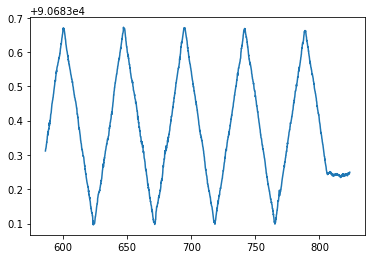

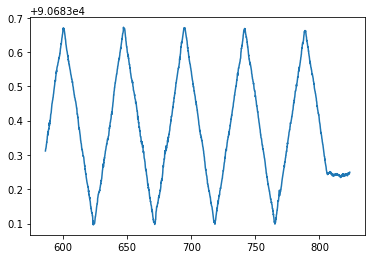

In [131]:
%matplotlib inline
time=df_gnrmc_xy_dist_rm_times.loc[3750:5600,'times']
dist=df_gnrmc_xy_dist_rm_times.loc[3750:5600,'dist']
plt.plot(time,dist)

df_gnrmc_xy_dist_first=df_gnrmc_xy_dist_rm_times[3750:5600]

df_gnrmc_xy_dist_first
df_gnrmc_xy_dist_first.to_csv('C:\\Users\survey\Desktop\\nmea20210705\\2021-07-05_09+10_GNRMC_first.csv')

df_gnrmc_xy_dist_first_rm=df_gnrmc_xy_dist_first[['ID','time','de','lat',4,'lon',6,'knot','date','mode',13,'X','Y','dist']]

df_gnrmc_xy_dist_first_rm

df_gnrmc_xy_dist.drop(df_gnrmc_xy_dist.columns[[41,42,45,46,47]], axis=1)

## 同期処理後半スタート


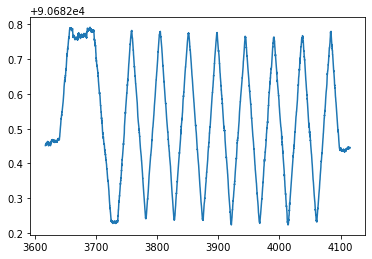

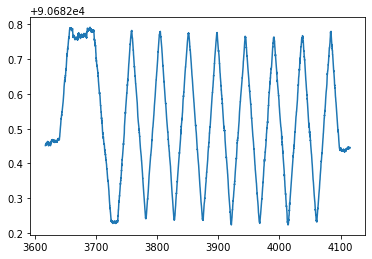

In [132]:
%matplotlib inline
time=df_gnrmc_xy_dist_rm_times.loc[26900:30718,'times']
dist=df_gnrmc_xy_dist_rm_times.loc[26900:30718,'dist']
plt.plot(time,dist)

# ここで「行レベル」で抽出しよう．
df_gnrmc_xy_dist_rm_last=df_gnrmc_xy_dist_rm[26900:30718]
df_gnrmc_xy_dist_rm_last
df_gnrmc_xy_dist_rm_last.to_csv('C:\\Users\survey\Desktop\\nmea20210705\\2021-07-05_09+10_GNRMC_last.csv')

### 3.2. テスト
- [国土地理院の換算サービス](http://vldb.gsi.go.jp/sokuchi/surveycalc/surveycalc/bl2xyf.html)と比較

x, y = calc_xy(df_gnrmc_ll_np_wa[:,0], df_gnrmc_ll_np_wa[:,1], 36., 137+10./60)
# print "x, y = ({0}, {1})".format(x, y)

x, y = calc_xy(36.103774791666666, 140.08785504166664, 36., 139+50./60)
print "x, y = ({0}, {1})".format(x, y)
